In [1]:
# Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Company_Data

In [4]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
# EDA

In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df.duplicated().sum()

0

<Axes: >

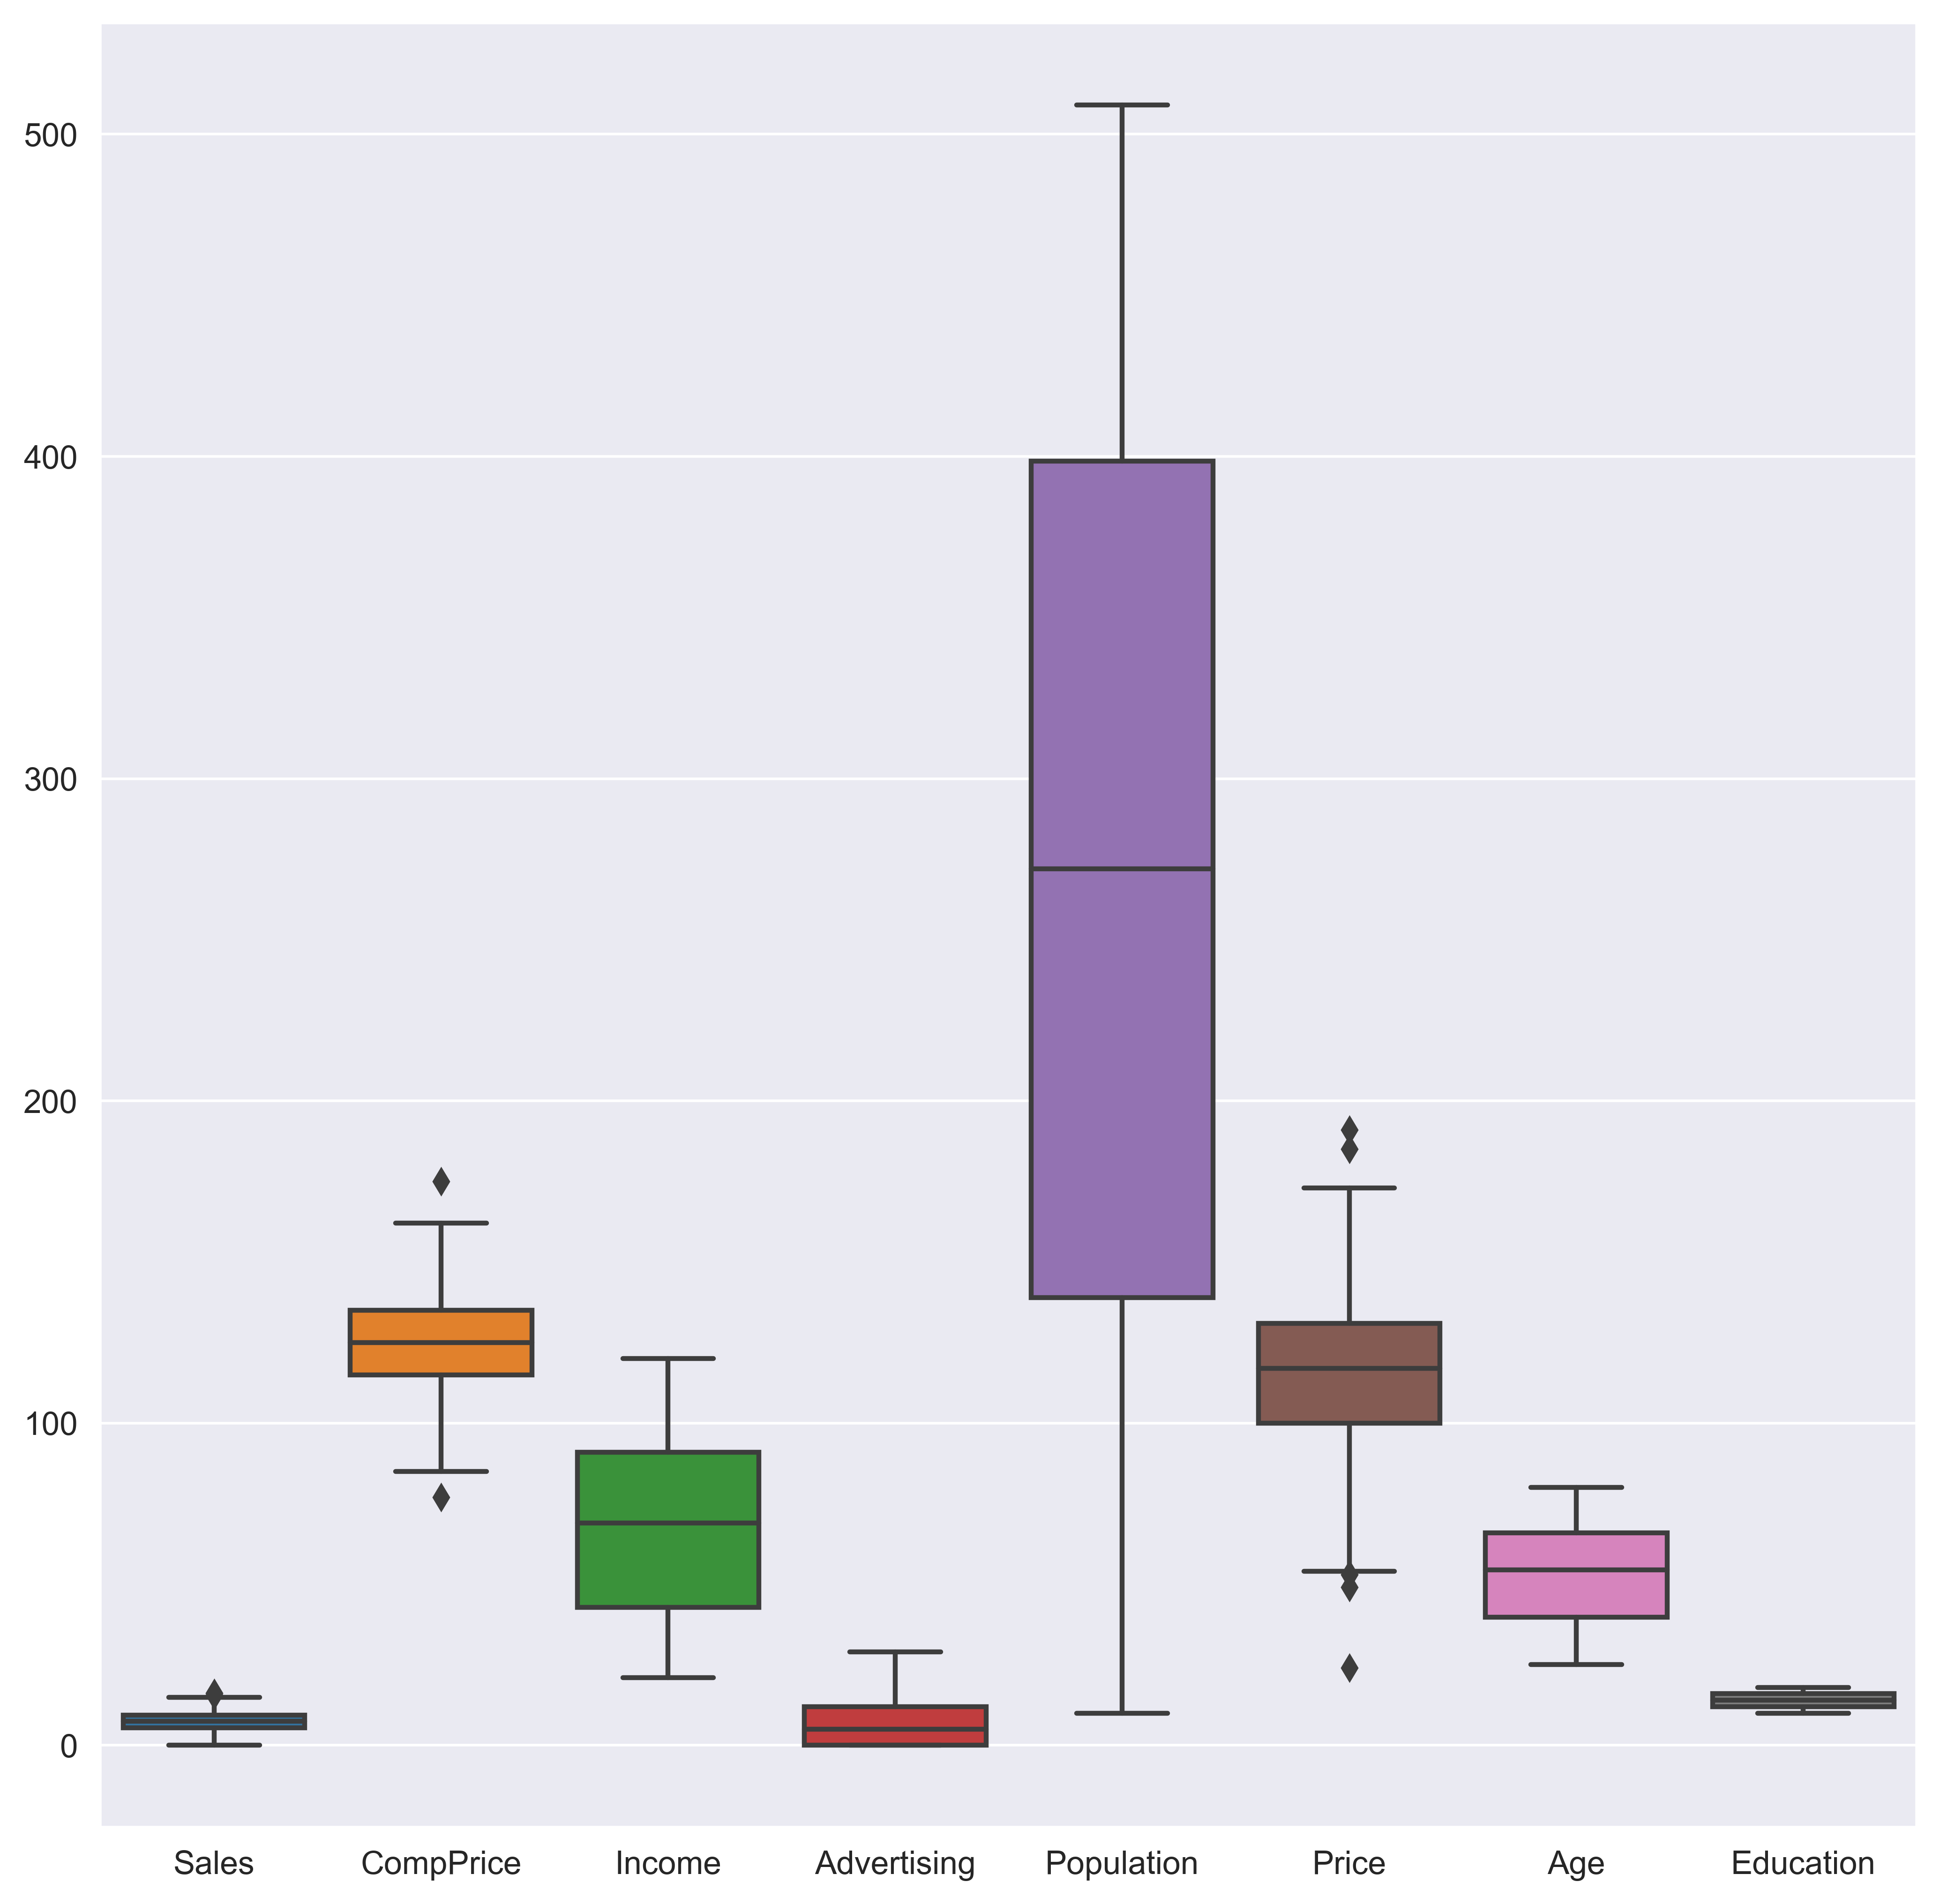

In [9]:
sns.boxplot(df)

In [10]:
#Lets Find Out the Range of the feature 'Sales'. Since, We need to convert it into categorical Variable

In [11]:
df['Sales'].max()

16.27

In [12]:
df['Sales'].min()

0.0

In [13]:
range = df['Sales'].max() - df['Sales'].min()
range

16.27

In [14]:
#So if we Want to Partition the Sales Variable into 2 Groups comprising the Range of Values, Then:

In [15]:
df['Sales'].median()

7.49

In [16]:
df['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [17]:
bins = [0.0,7.5,16.5]
labels = [0,1]

In [18]:
df['sales'] = pd.cut(df['Sales'], bins= bins, labels= labels, include_lowest= True)

In [19]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [20]:
company_data = df.iloc[:,1:]
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,139,23,3,37,120,Medium,55,11,No,Yes,0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [21]:
#encoding the necessary Columns

In [22]:
company_data.describe(include = object)

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [23]:
#Since each of these object variable are having 2,3 unique values we can perform label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
company_data['ShelveLoc'] = le.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = le.fit_transform(company_data['Urban'])
company_data['US'] = le.fit_transform(company_data['US'])

In [26]:
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


In [27]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    int32   
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int32   
 9   US           400 non-null    int32   
 10  sales        400 non-null    category
dtypes: category(1), int32(3), int64(7)
memory usage: 27.2 KB


In [28]:
#Model Building

In [29]:
#Splitting the Data

x = company_data.iloc[:,:-1]
y = company_data['sales']

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= .2, random_state= 42)

In [31]:
dtc = DecisionTreeClassifier(criterion= 'gini')

In [32]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [33]:
# Model Evaluation

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        37
           1       0.71      0.70      0.71        43

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.69      0.69      0.69        80



In [36]:
print('Training Accuracy : ', dtc.score(xtrain,ytrain))
print('Testing Accuracy : ', dtc.score(xtest,ytest))

Training Accuracy :  1.0
Testing Accuracy :  0.6875


In [37]:
# We Have created an Overfitted Model. Hyper parameter Tuning is required.

In [38]:
#Hyper parameter Tuning

In [39]:
#DecisionTreeClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'splitter' : ['best', 'random'],
    'min_samples_split' : [1,2,3,4,5,6,7,8,9],
    'min_samples_leaf' : [1,2,4,5,6,7,8,9]
}

In [42]:
grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid= params,
                   verbose= 1)

In [43]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [46]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9 , splitter= 'random', min_samples_leaf= 6, min_samples_split= 6)

In [47]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [48]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.85      0.79      0.82        43

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



In [49]:
print('Training Accuracy : ', dtc.score(xtrain,ytrain))
print('Testing Accuracy : ', dtc.score(xtest,ytest))

Training Accuracy :  0.834375
Testing Accuracy :  0.8125


In [ ]:
# Plotting the Decision Tree

In [50]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

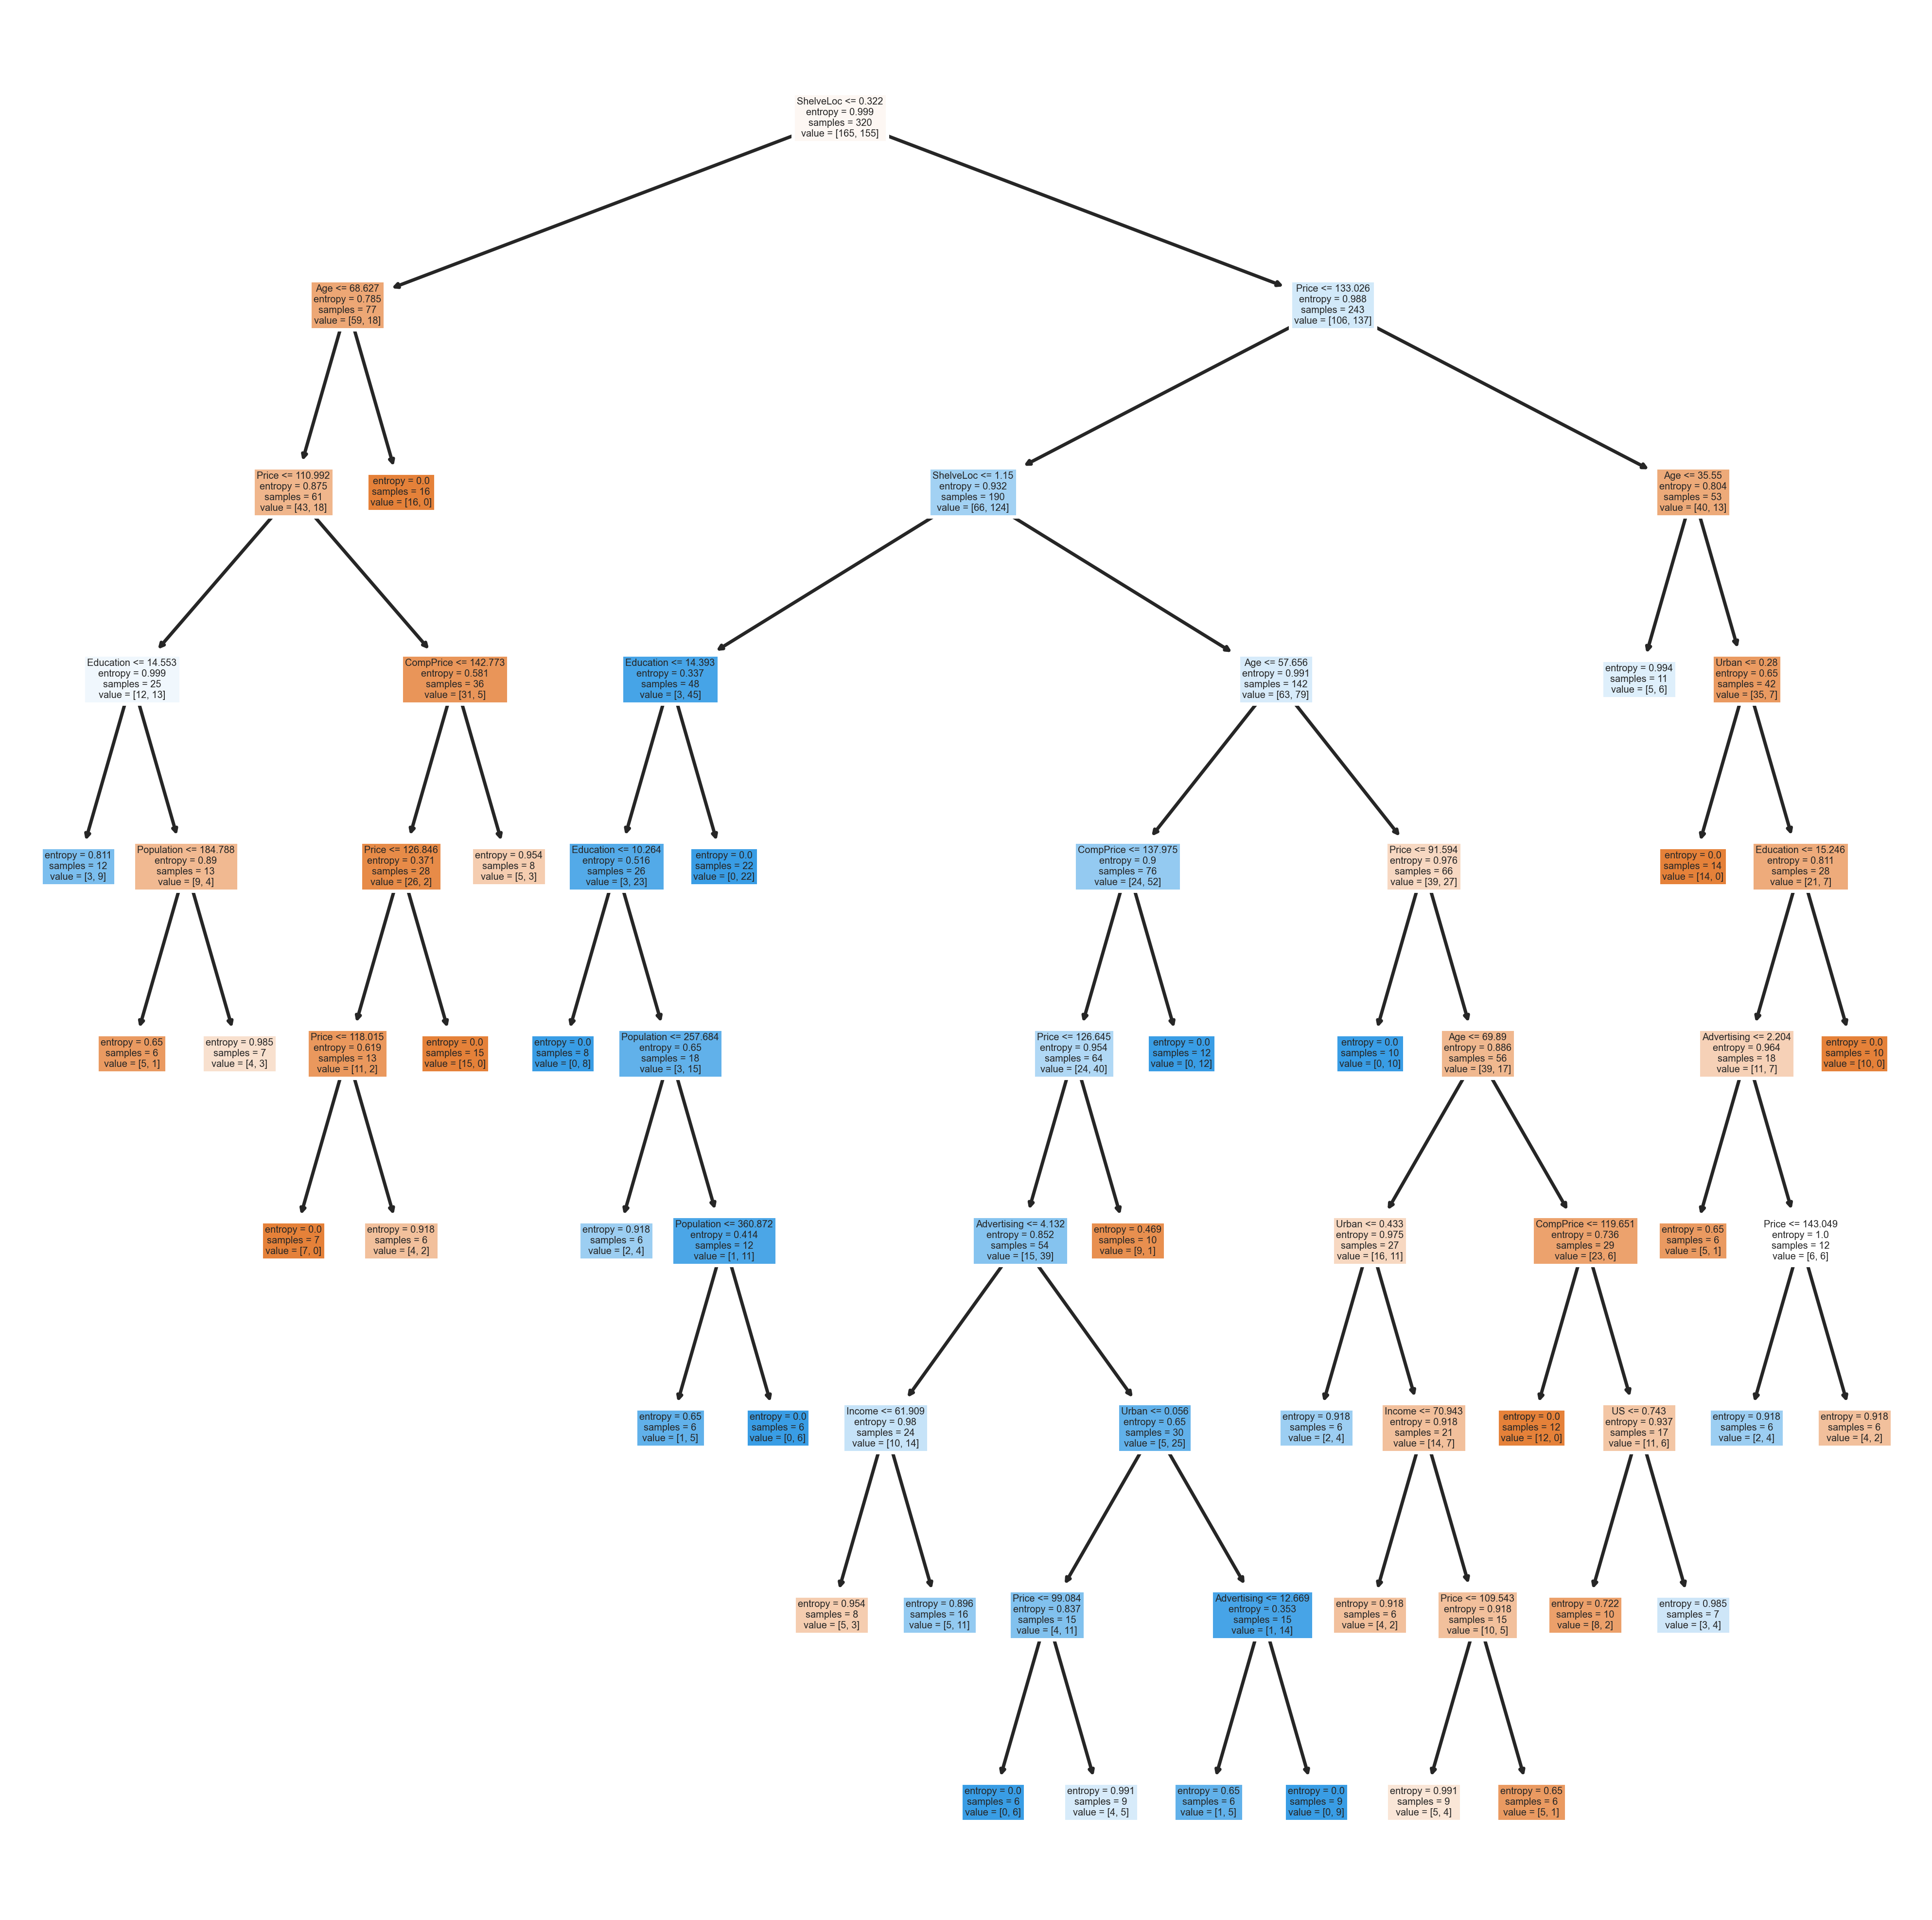

In [51]:
tree.plot_tree(dtc, feature_names= x.columns, filled= True)
plt.show()

In [52]:
dtc.feature_importances_

array([0.0899717 , 0.00890888, 0.03382944, 0.01770601, 0.36705107,
       0.22700963, 0.12236685, 0.07792154, 0.04481098, 0.01042392])

In [53]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [54]:
#Price Column is the most important of them all

In [55]:
# Fraud_Check

In [56]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [57]:
# EDA

In [58]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [59]:
df.describe(include = object)

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [61]:
df.duplicated().sum()

0

<Axes: >

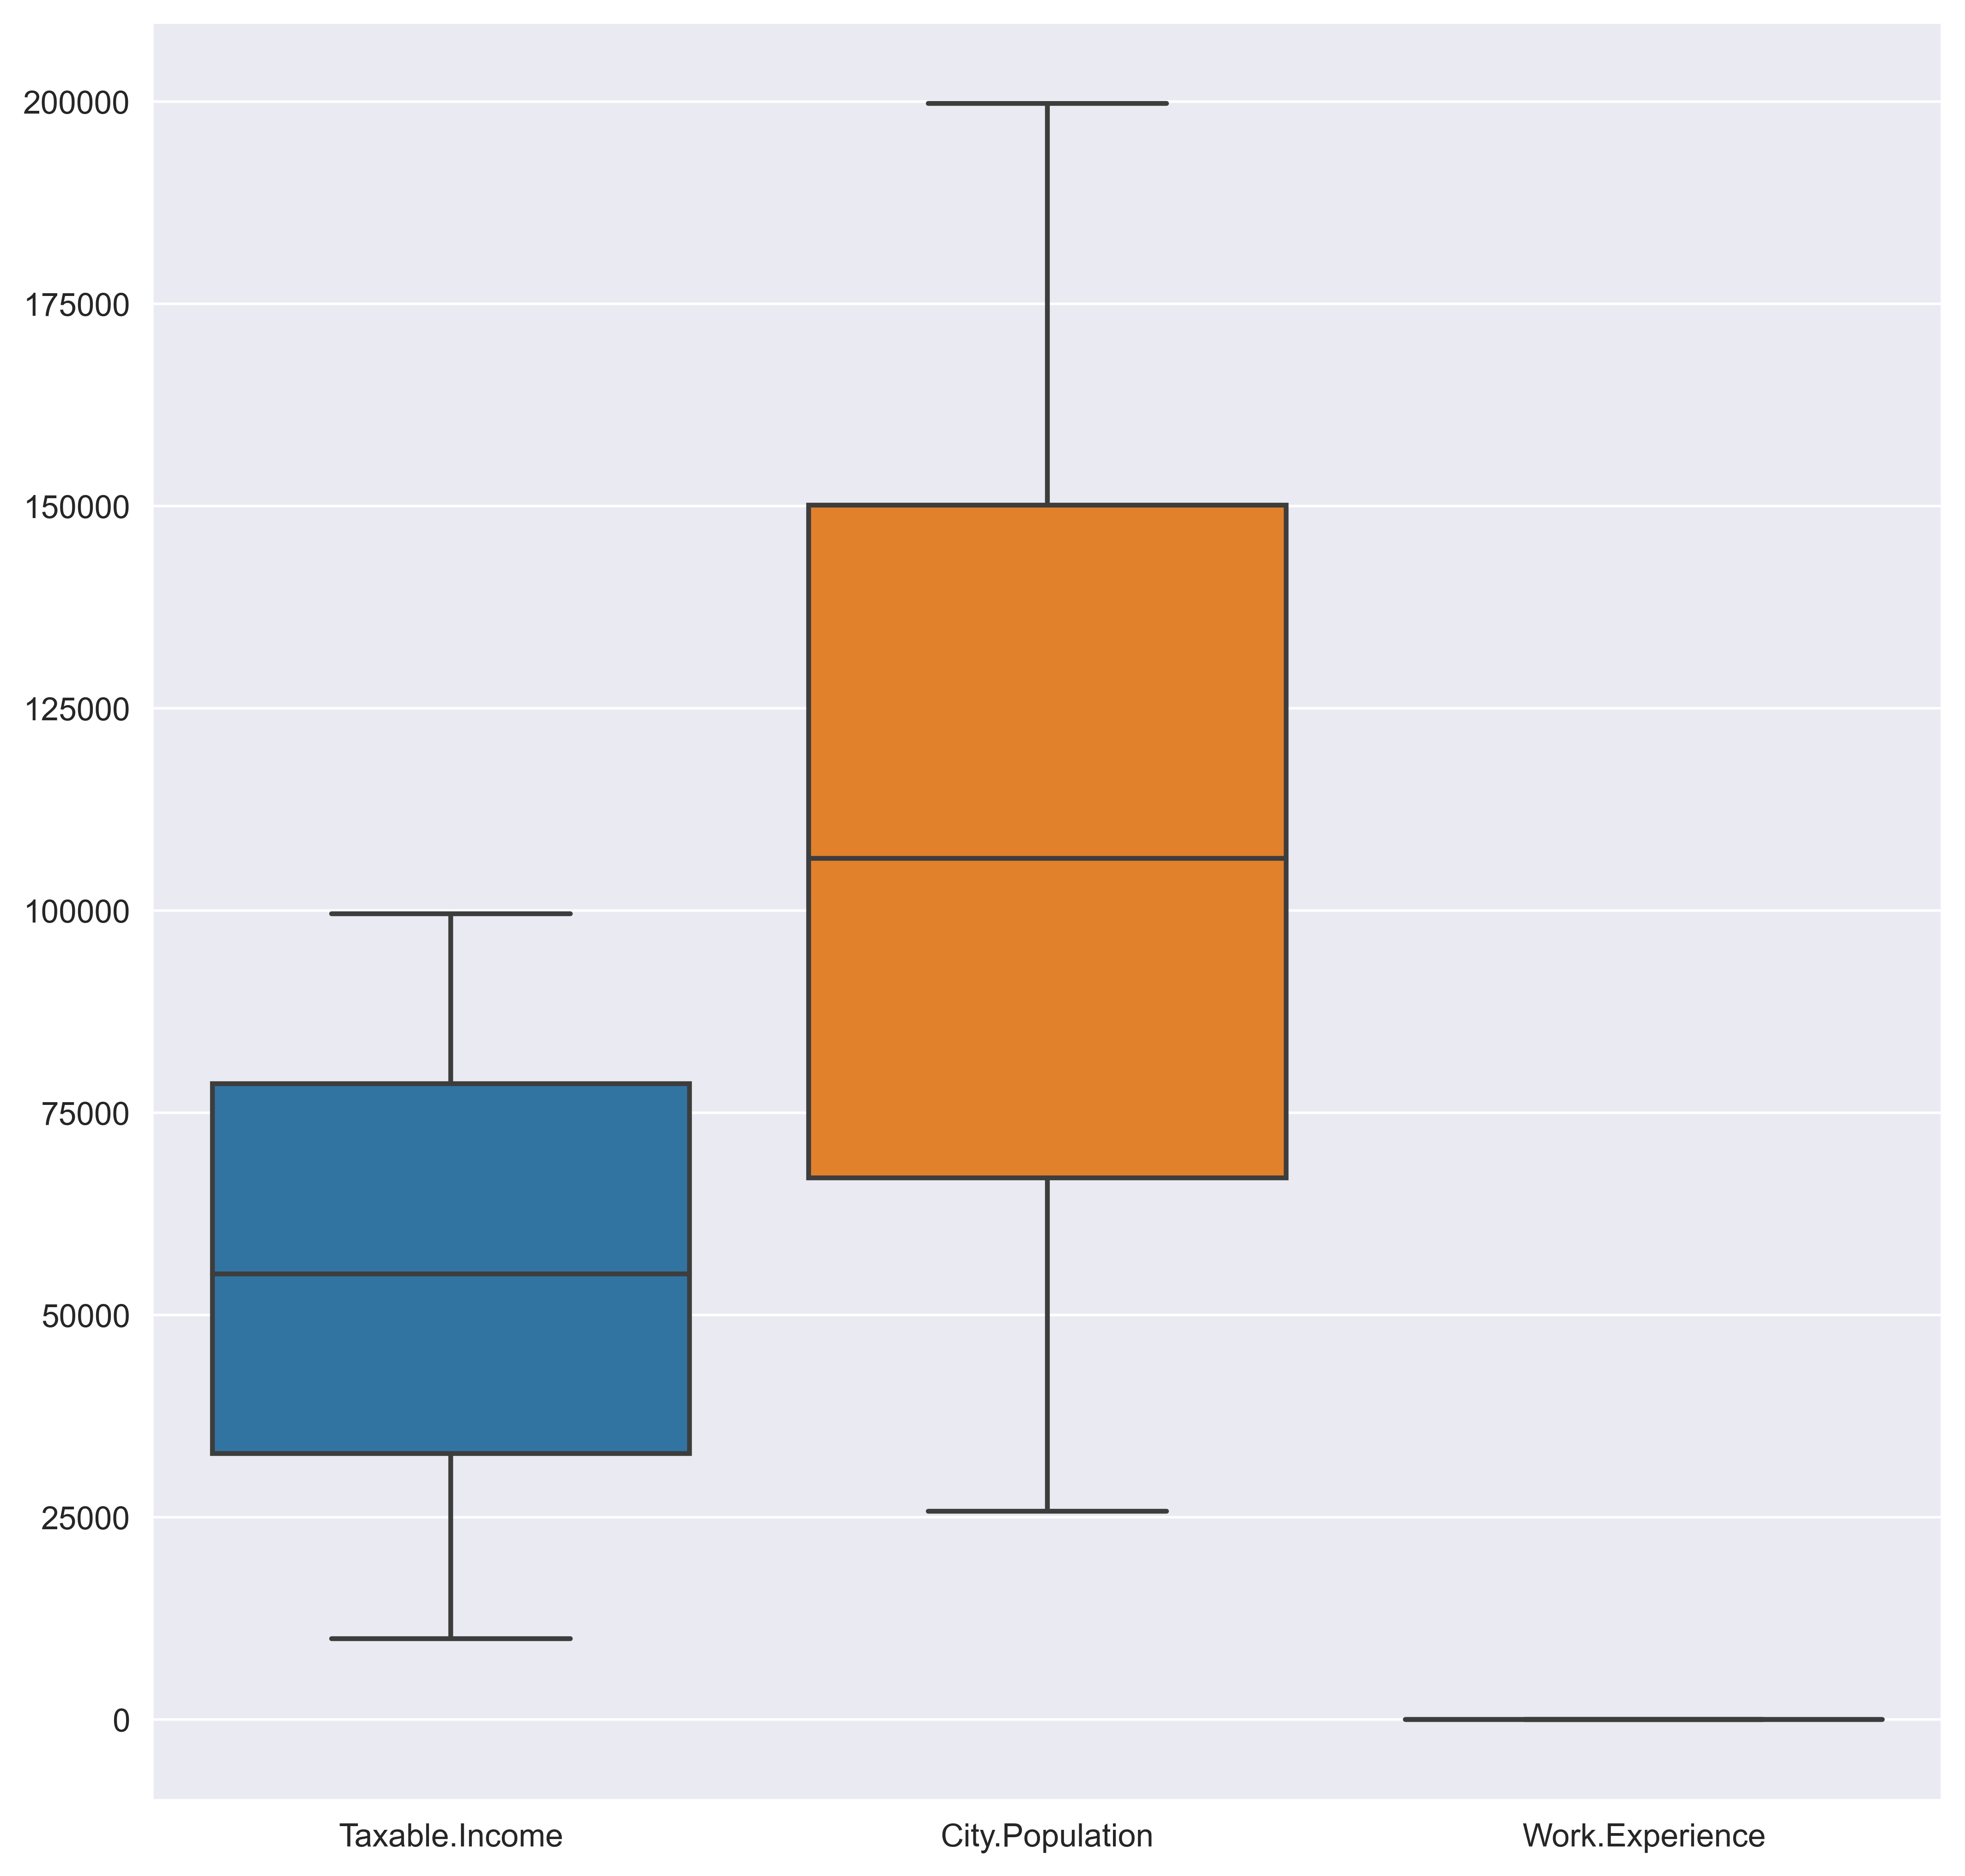

In [62]:
sns.boxplot(df)

In [63]:
''' Now,PS: We have to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good". '''

' Now,PS: We have to prepare a model on fraud data \ntreating those who have taxable_income <= 30000 as "Risky" and others are "Good". '

In [64]:
#Rearranging the Columns
data = df.pop('Taxable.Income')

In [65]:
df.insert(5, 'Taxable.Income', data)

In [66]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340
596,YES,Divorced,55369,2,YES,69967
597,NO,Divorced,154058,0,YES,47334
598,YES,Married,180083,17,NO,98592


In [67]:
# Encoding the Values

In [68]:
df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['Marital.Status'] = le.fit_transform(df['Marital.Status'])
df['Urban'] = le.fit_transform(df['Urban'])

In [69]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002
...,...,...,...,...,...,...
595,1,0,39492,7,1,76340
596,1,0,55369,2,1,69967
597,0,0,154058,0,1,47334
598,1,1,180083,17,0,98592


In [70]:
#Finding out the Range of 'Taxable Income' Column
df['Taxable.Income'].max()

99619

In [71]:
df['Taxable.Income'].min()

10003

In [72]:
bins = [0,30000,100000]
labels = ['Risky','Good']

In [73]:
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins= bins, labels= labels, include_lowest= True)

In [74]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [88]:
df['Taxable.Income'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [75]:
# Splitting the Data into Training and Testing

In [77]:
x = df.iloc[:,:-1]
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [78]:
y = df['Taxable.Income']
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [80]:
# Model Building

In [81]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'splitter' : ['best', 'random'],
    'min_samples_split' : [1,2,3,4,5,6,7,8,9],
    'min_samples_leaf' : [1,2,4,5,6,7,8,9]
}

In [82]:
grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid= params,
                   verbose= 1)

In [83]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [84]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [85]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5 , splitter= 'random', min_samples_leaf= 4, min_samples_split= 2)

In [86]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [89]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        Good       0.78      1.00      0.88        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [90]:
print('Training Accuracy : ', dtc.score(xtrain,ytrain))
print('Testing Accuracy : ', dtc.score(xtest,ytest))

Training Accuracy :  0.7958333333333333
Testing Accuracy :  0.7833333333333333


In [91]:
# Plotting the Decision Tree

In [92]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

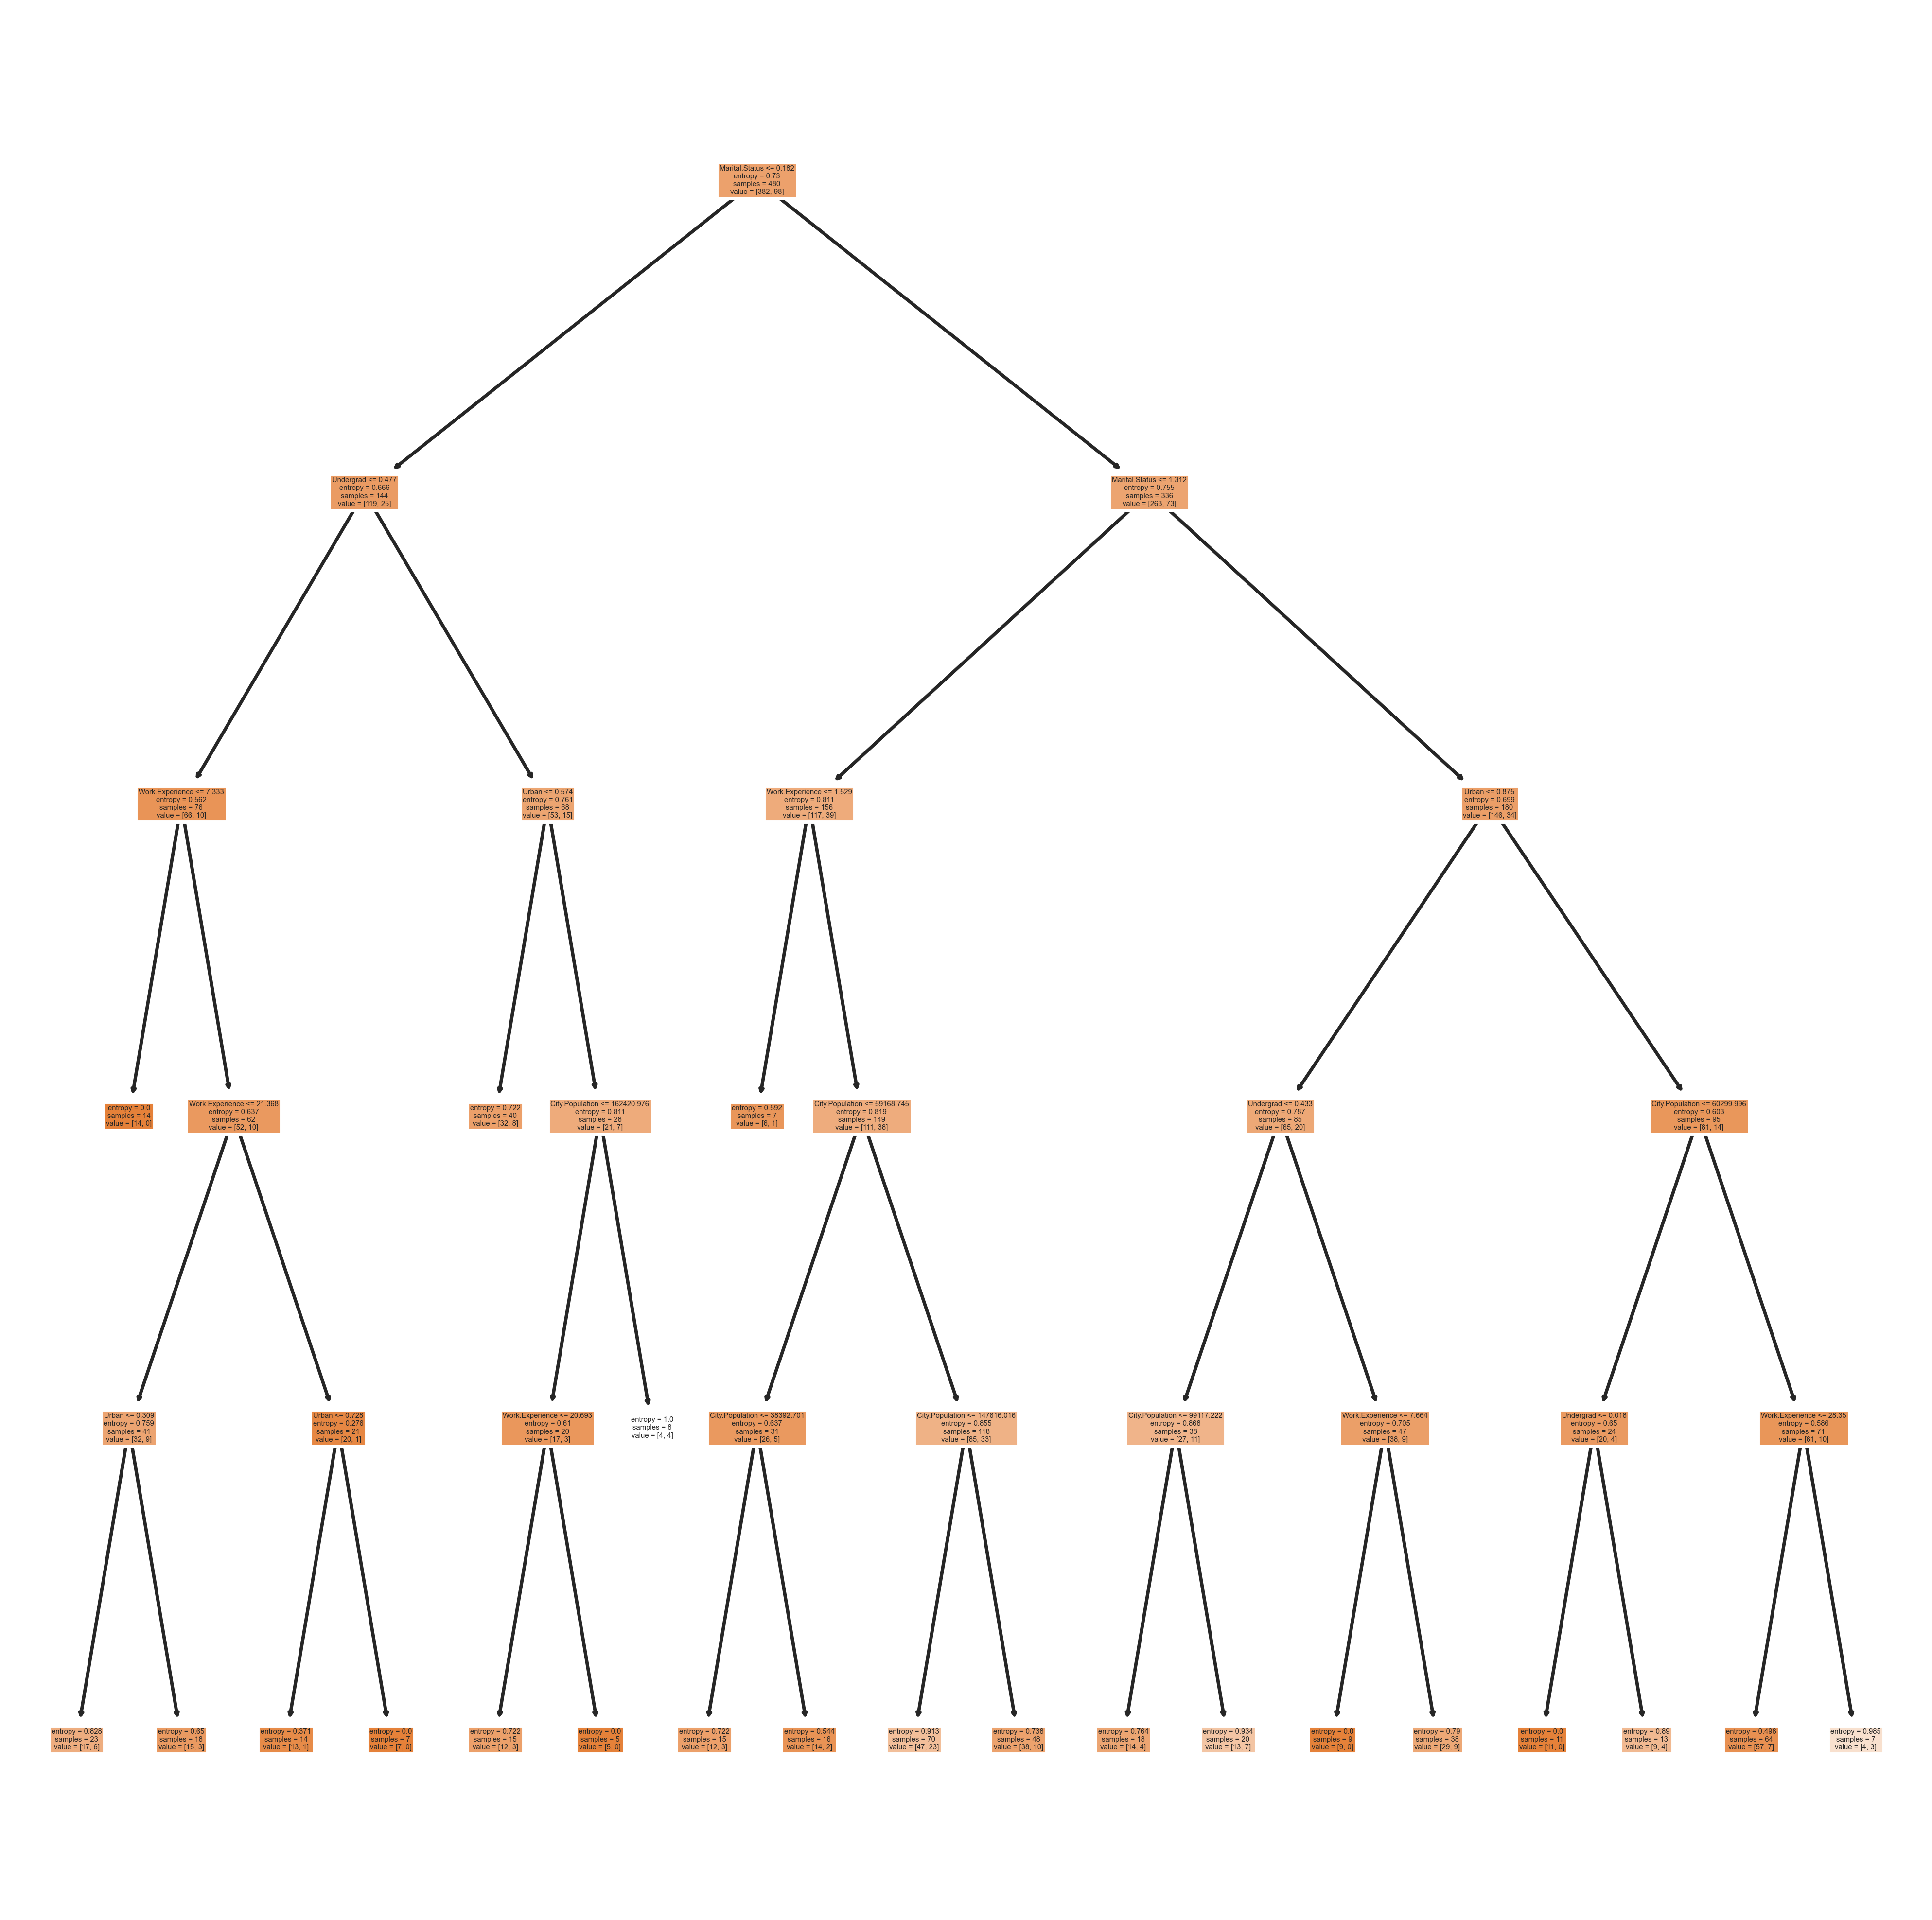

In [93]:
tree.plot_tree(dtc, feature_names= x.columns, filled= True)
plt.show()

In [94]:
dtc.feature_importances_

array([0.20199245, 0.07077407, 0.20271059, 0.4344149 , 0.09010799])

In [95]:
#Work Experience is the most important Column